<a href="https://colab.research.google.com/github/muhammadalinoor-1982/ML-Model/blob/main/AI_Enabled_Personalized_Treatment_Plans_for_Cancer_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
variant_df = pd.read_csv('/content/drive/MyDrive/AI/Dataset/Personalized Medicine Redefining Cancer Treatment/training_variants.csv')
print('Total Number of Datapoints: ', variant_df.shape[0])
print('Total Number of Features: ', variant_df.shape[1])
print('All Features Name: ', variant_df.columns.values)
variant_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  4
All Features Name:  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
2188,2188,PTEN,P169H,4
947,947,PDGFRB,CEP85L-PDGFRB Fusion,2
46,46,PTPRT,T844M,4
2784,2784,BRCA2,R2418G,6
2161,2161,PTEN,L181P,4


In [ ]:
text_df = pd.read_csv('/content/drive/MyDrive/AI/Dataset/Personalized Medicine Redefining Cancer Treatment/training_text.csv', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Total Number of Datapoints: ', text_df.shape[0])
print('Total Number of Features: ', text_df.shape[1])
print('All Features Name: ', text_df.columns.values)
text_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  2
All Features Name:  ['ID' 'TEXT']


,ID,TEXT
2192,2192,The PTEN (phosphatase and tensin homolog) phos...
1077,1077,Forkhead box protein A1 (FOXA1) modulates the ...
1654,1654,An internal tandem duplication (ITD) of the FL...
1479,1479,Activating mutations in the tyrosine kinase do...
193,193,In contrast to other primary epidermal growth...


In [ ]:
from wordcloud import STOPWORDS, WordCloud
wordcloud = set(STOPWORDS)
wordcloud

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080,
                      width=1920,
                      background_color='black',
                      min_font_size=10,
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

In [ ]:
text = list(text_df[text_df['ID']==2535]['TEXT'])

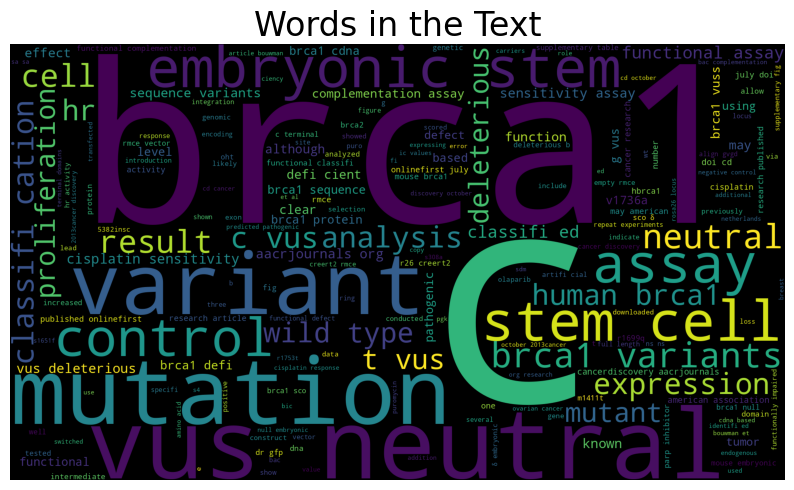

In [ ]:
create_cloud(' '.join(text).lower(), 'Words in the Text')

In [ ]:
import re
from wordcloud import STOPWORDS, WordCloud

In [ ]:
stop_words = set(STOPWORDS)

def clean_text(total_text, index, column):
  if type(total_text) is not int:
    text = ''

    # replace every special char with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)

    # replace multiple spaces with single space
    total_text = re.sub('\s+', ' ', total_text)

    # converting all the chars into lower-case.
    total_text = total_text.lower()

    # Combining all the above sentence

    from tqdm import tqdm
    # tqdm is for printing the status bar

    for word in tqdm(total_text.split()):
    # if the word is a not a stop word then retain that word from the data
      if not word in stop_words:
        text += word + ' '

    text_df[column][index] = text

    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in total_text:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [ ]:
for index, row in text_df.iterrows():
  if type(row['TEXT']) is str:
    clean_text(row['TEXT'], index, 'TEXT')
  else:
    print('There is no text description for ID: ', index)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 4649/4649 [00:00<00:00, 835374.83it/s]
/tmp/ipython-input-6-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in t

There is no text description for ID:  1109


100%|██████████| 15609/15609 [00:00<00:00, 1404248.88it/s]
/tmp/ipython-input-6-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
/tmp/ipython-input-6-3644726959.py:26: SettingWithCopyWarning: 
A v

There is no text description for ID:  1277


100%|██████████| 21096/21096 [00:00<00:00, 1191915.47it/s]
/tmp/ipython-input-6-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
/tmp/ipython-input-6-3644726959.py:26: SettingWithCopyWarning: 
A v

There is no text description for ID:  1407


100%|██████████| 5664/5664 [00:00<00:00, 1171484.68it/s]
/tmp/ipython-input-6-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  text_df[column][index] = text
/tmp/ipython-input-6-3644726959.py:26: SettingWithCopyWarning: 
A val

There is no text description for ID:  1639


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6726/6726 [00:00<00:00, 1104836.25it/s]
/tmp/ipython-input-6-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in 

There is no text description for ID:  2755


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 11428/11428 [00:00<00:00, 992535.28it/s]
/tmp/ipython-input-6-3644726959.py:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in

In [ ]:
df = pd.merge(variant_df, text_df, on='ID', how='left')
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   TEXT       3316 non-null   object
dtypes: int64(2), object(3)
memory usage: 129.9+ KB


In [ ]:
df.isna().sum()

,0
ID,0
Gene,0
Variation,0
Class,0
TEXT,5


In [ ]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [ ]:
df.loc[df['TEXT'].isnull(), 'TEXT'] = df['Gene']+' '+df['Variation']

In [ ]:
df[df['ID']==2755]

,ID,Gene,Variation,Class,TEXT
2755,2755,BRAF,G596C,7,BRAF G596C


In [ ]:
df.isna().sum()

,0
ID,0
Gene,0
Variation,0
Class,0
TEXT,0


In [ ]:
df['Class'].value_counts(), df.nunique()

(Class
 7    953
 4    686
 1    568
 2    452
 6    275
 5    242
 3     89
 9     37
 8     19
 Name: count, dtype: int64,
 ID           3321
 Gene          264
 Variation    2996
 Class           9
 TEXT         1925
 dtype: int64)

In [ ]:
df.sample(5)

,ID,Gene,Variation,Class,TEXT
535,535,SMAD2,P305L,1,activation canonical tgf signaling pathway pro...
3175,3175,RAB35,A151T,7,shrna screen genes affect akt phosphorylation ...
2336,2336,JAK2,S1039F,6,myeloproliferative neoplasms mpns group hemato...
223,223,EGFR,L861R,7,purpose clinical features epidermal growth fac...
883,883,PDGFRA,H570R,3,fip1l1 pdgfra fusion seen fraction cases presu...


In [ ]:
df['Gene_Variation_TEXT'] = df['Gene']+' '+df['Variation']+' '+df['TEXT']
df

,ID,Gene,Variation,Class,TEXT,Gene_Variation_TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...,FAM58A Truncating Mutations cyclin dependent k...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,CBL W802* abstract background non small cell l...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,CBL Q249E abstract background non small cell l...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,CBL N454D recent evidence demonstrated acquire...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,CBL L399V oncogenic mutations monomeric casita...
...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndromes mds het...,RUNX1 D171N introduction myelodysplastic syndr...
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes mds het...,RUNX1 A122* introduction myelodysplastic syndr...
3318,3318,RUNX1,Fusions,1,runt related transcription factor 1 gene runx1...,RUNX1 Fusions runt related transcription facto...
3319,3319,RUNX1,R80C,4,runx1 aml1 gene frequent target chromosomal tr...,RUNX1 R80C runx1 aml1 gene frequent target chr...


In [ ]:
y_raw = df['Class']
X_raw = df['Gene_Variation_TEXT']
documents = df['Gene_Variation_TEXT'].values

In [ ]:
y_raw.value_counts(), y_raw.nunique()

(Class
 7    953
 4    686
 1    568
 2    452
 6    275
 5    242
 3     89
 9     37
 8     19
 Name: count, dtype: int64,
 9)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.9, min_df=3, sublinear_tf=True, max_features=30000)
X_tfidf = tfidf.fit_transform(X_raw)
X_tfidf,X_tfidf.shape

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 6959711 stored elements and shape (3321, 30000)>,
 (3321, 30000))

In [ ]:
# Dimensionality reduction with TruncatedSVD (PCA for sparse data)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)

In [ ]:
# Outlier removal using Isolation Forest from tfidf sparse Matrix
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.02, random_state=42)
iso_labels = iso.fit_predict(X_reduced)

In [ ]:
# Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.02)
lof_labels = lof.fit_predict(X_reduced)  # -1 = outlier

In [ ]:
# Z-score on document length
from scipy.stats import zscore
doc_lengths = np.array([len(doc.split()) for doc in documents])
z_scores = zscore(doc_lengths)
length_mask = np.abs(z_scores) < 3  # keep only normal-length documents

In [ ]:
# Combine all masks (keep rows where all agree on inliers)
mask = (iso_labels == 1) & (lof_labels == 1) & length_mask

In [ ]:
# Filter cleaned data
X_clean = X_tfidf[mask]
y_clean = y_raw[mask]
documents_clean = documents[mask]

In [ ]:
print(f"Original samples: {len(y_raw)}")
print(f"Samples after cleaning: {len(y_clean)}")

Original samples: 3321
Samples after cleaning: 3141


In [ ]:
# Convert TF-IDF (sparse) Matrix to Dense Format
X_dense = X_tfidf.toarray()

In [ ]:
# Reduce to 2D using PCA: Prepare to visualize data
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense) # Sequence of convertion: X_raw > X_tfidf > X_dense > X_pca
X_pca_clean = X_pca[mask]

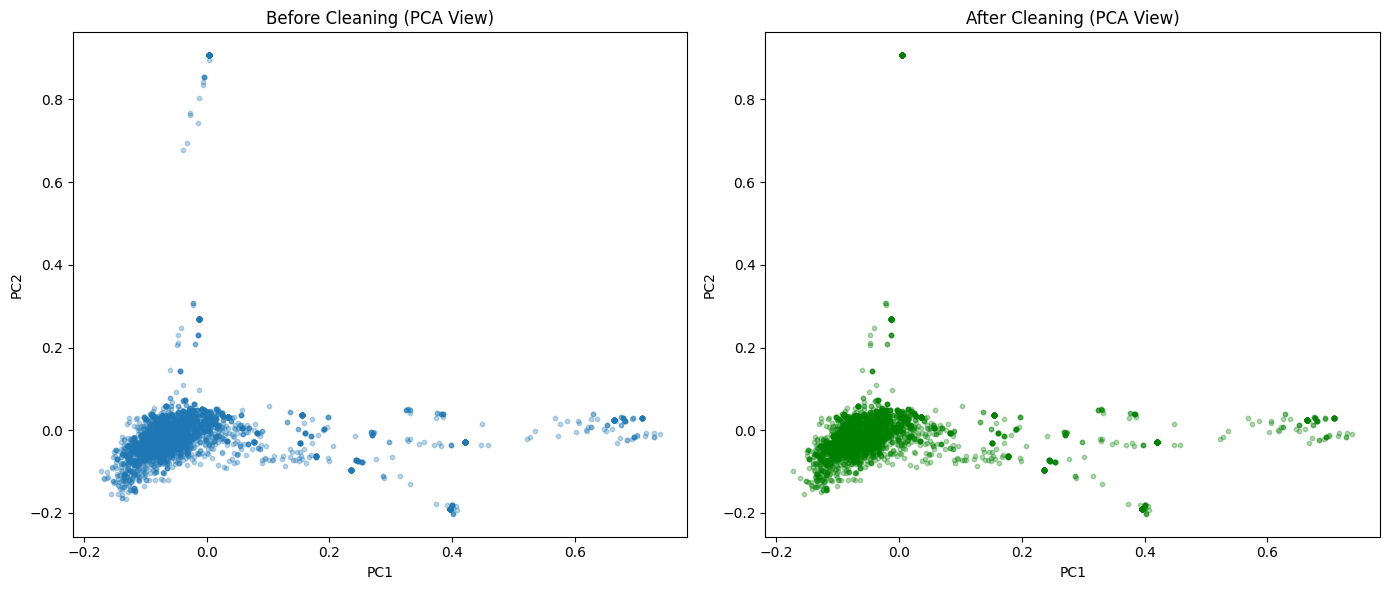

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.3, label='All')
plt.title("Before Cleaning (PCA View)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca_clean[:, 0], X_pca_clean[:, 1], s=10, c='green', alpha=0.3, label='Cleaned')
plt.title("After Cleaning (PCA View)")
plt.xlabel("PC1"); plt.ylabel("PC2")

plt.tight_layout()
plt.show()

In [ ]:
X = X_clean
y = y_clean

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler(with_mean=False)
X = std.fit_transform(X)
X, X.shape

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 6378386 stored elements and shape (3141, 30000)>,
 (3141, 30000))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 19236748 stored elements and shape (8082, 30000)>,
 0       1
 1       2
 2       2
 3       3
 4       4
        ..
 8077    9
 8078    9
 8079    9
 8080    9
 8081    9
 Name: Class, Length: 8082, dtype: int64)

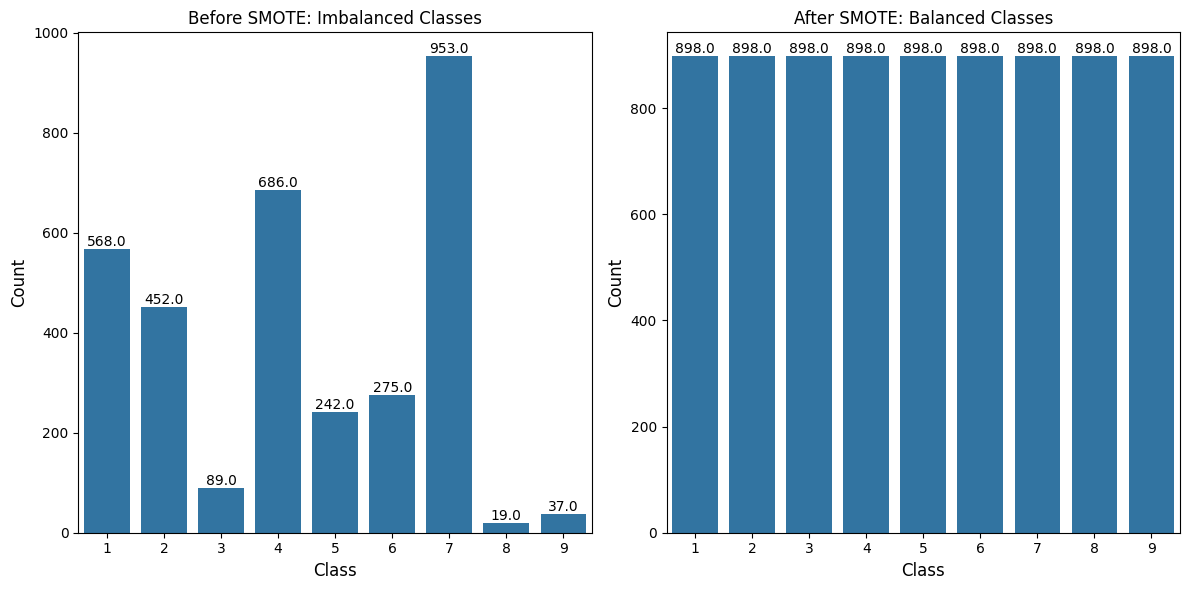

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Before SMOTE
sns.countplot(x='Class', data=variant_df, ax=axes[0])
axes[0].set_title('Before SMOTE: Imbalanced Classes', fontsize=12)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Plot After SMOTE
sns.countplot(x=y_resampled, ax=axes[1])
axes[1].set_title('After SMOTE: Balanced Classes', fontsize=12)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Add count labels to both plots
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

# Adjust layout and save
plt.tight_layout()
plt.savefig("Before_After_SMOTE.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6465, 30000), (1617, 30000), (6465,), (1617,))

## 1. K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    'metric': 'cosine',        # Often best for text data
    'n_neighbors': 7,          # Typically 5-11 for medical data
    'p': 2,                    # Standard Euclidean
    'weights': 'distance'      # Weight by inverse distance
}
KNN_model = KNeighborsClassifier(
    #algorithm='kd_tree',  # or 'ball_tree' for high dimensions
    leaf_size=30,
    algorithm='auto',
    n_jobs=-1,
    **params
)
KNN_model.fit(X_train, y_train)

y_pred_train = KNN_model.predict(X_train)
print('Accuracy Score for Training: ', accuracy_score(y_pred_train,y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = KNN_model.predict(X_test)
print('Accuracy Score for Testing: ', accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training:  0.9472544470224284

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.94      0.87      0.91       786
           2       0.98      0.97      0.97       727
           3       0.88      0.95      0.91       665
           4       0.95      0.97      0.96       703
           5       0.88      0.93      0.90       682
           6       0.98      0.98      0.98       712
           7       0.92      0.88      0.90       773
           8       1.00      1.00      1.00       698
           9       0.99      1.00      0.99       719

    accuracy                           0.95      6465
   macro avg       0.95      0.95      0.95      6465
weighted avg       0.95      0.95      0.95      6465

Accuracy Score for Testing:  0.8404452690166976

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.75      0.70      0.72       178
           2  

## 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#lr_model = LogisticRegression(max_iter=10000, class_weight='balanced')
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = lr_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training: 0.9495746326372776

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90       697
           2       0.96      0.97      0.97       710
           3       0.98      0.91      0.95       769
           4       0.91      0.95      0.93       686
           5       0.94      0.86      0.90       786
           6       0.97      0.97      0.97       712
           7       0.90      0.97      0.93       681
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       726

    accuracy                           0.95      6465
   macro avg       0.95      0.95      0.95      6465
weighted avg       0.95      0.95      0.95      6465

Accuracy Score for Testing: 0.8855905998763142

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.78      0.77      0.78       170
           2    

## 3. Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
#svm_model = LinearSVC(C=0.01, loss='hinge', max_iter=10000, class_weight='balanced')
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = svm_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score for Training: 0.94292343387471

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.89      0.89      0.89       729
           2       0.95      0.97      0.96       710
           3       0.99      0.90      0.95       781
           4       0.93      0.92      0.92       723
           5       0.88      0.89      0.88       716
           6       0.97      0.97      0.97       703
           7       0.88      0.96      0.92       675
           8       1.00      1.00      1.00       702
           9       1.00      1.00      1.00       726

    accuracy                           0.94      6465
   macro avg       0.94      0.94      0.94      6465
weighted avg       0.94      0.94      0.94      6465

Accuracy Score for Testing: 0.8695114409400123

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.77      0.71      0.74       181
           2      

## 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rf_model = RandomForestClassifier(n_estimators=300, class_weight='balanced')
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = rf_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training: 0.965661252900232

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.92      0.93      0.93       720
           2       0.97      0.98      0.97       713
           3       0.99      0.95      0.97       736
           4       0.95      0.96      0.96       707
           5       0.95      0.91      0.93       750
           6       0.98      0.98      0.98       712
           7       0.93      0.97      0.95       702
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       727

    accuracy                           0.97      6465
   macro avg       0.97      0.97      0.97      6465
weighted avg       0.97      0.97      0.97      6465

Accuracy Score for Testing: 0.8837353123067409

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.80      0.75      0.77       179
           2     

## 5. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#dt_model = DecisionTreeClassifier(criterion='gini', max_features=None, max_depth=None, class_weight='balanced', random_state=42, min_samples_split=5, min_samples_leaf=2)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = dt_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training: 0.965661252900232

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93       731
           2       0.98      0.97      0.97       732
           3       0.99      0.95      0.97       738
           4       0.95      0.97      0.96       699
           5       0.95      0.92      0.93       740
           6       0.98      0.98      0.98       712
           7       0.92      0.98      0.95       688
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       727

    accuracy                           0.97      6465
   macro avg       0.97      0.97      0.97      6465
weighted avg       0.97      0.97      0.97      6465

Accuracy Score for Testing: 0.8113790970933829

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.69      0.66      0.68       173
           2     

## 6. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = gb_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training: 0.9532869296210363

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.89      0.93      0.91       696
           2       0.95      0.97      0.96       704
           3       0.99      0.94      0.96       748
           4       0.93      0.94      0.94       705
           5       0.93      0.89      0.91       750
           6       0.97      0.98      0.97       705
           7       0.93      0.94      0.93       728
           8       1.00      1.00      1.00       702
           9       1.00      1.00      1.00       727

    accuracy                           0.95      6465
   macro avg       0.95      0.95      0.95      6465
weighted avg       0.95      0.95      0.95      6465

Accuracy Score for Testing: 0.873222016079159

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.77      0.72      0.74       177
           2     

## 7. XG Boost

In [ ]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

params = {
    'colsample_bytree': 0.8,       # Typically 0.6-0.9
    'gamma': 0.1,                  # Regularization (0-0.2 common)
    'learning_rate': 0.05,         # Smaller rates better for text
    'max_depth': 5,                # 3-7 is optimal
    'min_child_weight': 1,         # 1-5
    'n_estimators': 200,           # 100-300
    'subsample': 0.8,              # 0.6-1.0
    'tree_method': 'hist',         # Faster training
    'grow_policy': 'lossguide',    # Better for text
    'max_leaves': 31               # Control complexity
}

from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    **params
)

xgb_model.fit(X_train, y_train_xgb)

y_pred_train = xgb_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train_xgb))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train_xgb))

y_pred_test = xgb_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test_xgb))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test_xgb))

Accuracy Score for Training: 0.9617942768754834

Classification Report for Training:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       701
           1       0.97      0.98      0.97       711
           2       0.99      0.94      0.96       744
           3       0.94      0.95      0.95       706
           4       0.95      0.91      0.93       753
           5       0.98      0.98      0.98       714
           6       0.93      0.96      0.95       711
           7       1.00      1.00      1.00       698
           8       1.00      1.00      1.00       727

    accuracy                           0.96      6465
   macro avg       0.96      0.96      0.96      6465
weighted avg       0.96      0.96      0.96      6465

Accuracy Score for Testing: 0.8837353123067409

Classification Report for Testing:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       177
           1    

## 8. Gaussian Naive Bayes

In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB(var_smoothing=1e-7)
nb_model.fit(X_train_dense, y_train)

y_pred_train = nb_model.predict(X_train_dense)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = nb_model.predict(X_test_dense)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training: 0.7293116782675947

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.56      0.71      0.62       581
           2       0.72      0.75      0.74       697
           3       0.80      0.82      0.81       692
           4       0.64      0.80      0.71       569
           5       0.54      0.55      0.54       706
           6       0.65      0.81      0.72       573
           7       0.77      0.59      0.67       957
           8       0.93      0.77      0.84       835
           9       0.96      0.81      0.88       855

    accuracy                           0.73      6465
   macro avg       0.73      0.74      0.73      6465
weighted avg       0.75      0.73      0.73      6465

Accuracy Score for Testing: 0.7235621521335807

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.60      0.63      0.62       158
           2    

## 9. Multilayer Perceptron Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier() # hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42
mlp_model.fit(X_train, y_train)

y_pred_train = mlp_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = mlp_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

Accuracy Score for Training: 0.9328692962103635

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.86      0.89      0.87       701
           2       0.95      0.98      0.96       696
           3       0.94      0.91      0.92       736
           4       0.89      0.92      0.90       696
           5       0.94      0.82      0.88       825
           6       0.93      0.96      0.94       681
           7       0.90      0.94      0.92       702
           8       1.00      1.00      1.00       702
           9       1.00      1.00      1.00       726

    accuracy                           0.93      6465
   macro avg       0.93      0.94      0.93      6465
weighted avg       0.93      0.93      0.93      6465

Accuracy Score for Testing: 0.878169449598021

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.77      0.75      0.76       171
           2     

## 10. Voting Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

models = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('svc', LinearSVC(max_iter=10000)),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('gb', GradientBoostingClassifier())
]

from sklearn.ensemble import VotingClassifier
vc_model = VotingClassifier(estimators=models, voting='hard')
vc_model.fit(X_train, y_train)

y_pred_train = vc_model.predict(X_train)
print("Accuracy Score for Training:", accuracy_score(y_pred_train, y_train))
print("\nClassification Report for Training:\n", classification_report(y_pred_train, y_train))

y_pred_test = vc_model.predict(X_test)
print("Accuracy Score for Testing:", accuracy_score(y_pred_test, y_test))
print("\nClassification Report for Testing:\n", classification_report(y_pred_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score for Training: 0.9624129930394432

Classification Report for Training:
               precision    recall  f1-score   support

           1       0.91      0.94      0.92       710
           2       0.97      0.97      0.97       717
           3       0.99      0.94      0.96       752
           4       0.94      0.96      0.95       699
           5       0.95      0.91      0.93       755
           6       0.98      0.98      0.98       711
           7       0.92      0.97      0.95       696
           8       1.00      1.00      1.00       698
           9       1.00      1.00      1.00       727

    accuracy                           0.96      6465
   macro avg       0.96      0.96      0.96      6465
weighted avg       0.96      0.96      0.96      6465

Accuracy Score for Testing: 0.8961038961038961

Classification Report for Testing:
               precision    recall  f1-score   support

           1       0.83      0.77      0.80       180
           2    